In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "bikesharecasestudy"

In [2]:
df<- read.csv('/kaggle/input/bikesharecasestudy/merged_data/merged.csv')

In [3]:
head(df, n=10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.90707,-87.66725,41.88918,-87.63851,member
2,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual
3,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual
4,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.86962,-87.62398,41.79526,-87.59647,casual
5,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.89147,-87.62676,41.93625,-87.65266,member
6,579D73BE2ED880B3,electric_bike,2022-07-01 17:04:35,2022-07-01 17:13:18,Desplaines St & Randolph St,15535,Clinton St & Roosevelt Rd,WL-008,41.88461,-87.64456,41.86712,-87.64109,member
7,EFE518CCEE333669,classic_bike,2022-07-18 18:11:01,2022-07-18 18:22:30,Marquette Ave & 89th St,20239,East End Ave & 87th St,20231,41.73367,-87.55834,41.73682,-87.58280,member
8,315FEBB7B3F6D2EA,classic_bike,2022-07-28 20:38:18,2022-07-28 21:09:11,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.89147,-87.62676,41.89897,-87.62991,casual
9,EE3C4A1E66766B56,classic_bike,2022-07-10 22:55:59,2022-07-10 23:01:32,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.89147,-87.62676,41.89897,-87.62991,member


In [4]:
# Get summary of each column
column_summary <- summary(df)

print(column_summary)

   ride_id          rideable_type       started_at          ended_at        
 Length:5779444     Length:5779444     Length:5779444     Length:5779444    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5779444     Length:5779444     Length:5779444     Length:5779444    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [5]:
# Get number of NA values in each column
na_counts <- colSums(is.na(df))

# Combine the results into a data frame
column_info <- data.frame(
  Column = names(df),
  NA_Counts = na_counts
)

# Print the column information
print(column_info)


                               Column NA_Counts
ride_id                       ride_id         0
rideable_type           rideable_type         0
started_at                 started_at         0
ended_at                     ended_at         0
start_station_name start_station_name         0
start_station_id     start_station_id         0
end_station_name     end_station_name         0
end_station_id         end_station_id         0
start_lat                   start_lat         0
start_lng                   start_lng         0
end_lat                       end_lat      5795
end_lng                       end_lng      5795
member_casual           member_casual         0


In [6]:
# Convert started_at and ended_at to datetime format
df$started_at <- as.POSIXct(df$started_at)
df$ended_at <- as.POSIXct(df$ended_at)

# Calculate ride_length
df$ride_length <- difftime(df$ended_at, df$started_at, units = "mins")  # You can change "mins" to other time units as needed

# Calculate day_of_week
df$day_of_week <- weekdays(df$started_at)


In [7]:
head(df, n=3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>
1,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.90707,-87.66725,41.88918,-87.63851,member,11.750000 mins,Tuesday
2,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual,1.883333 mins,Tuesday
3,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual,7.716667 mins,Sunday


In [8]:
annual_members <- subset(df, member_casual == "member")
casual_riders <- subset(df, member_casual == "casual")


In [9]:
# Calculate the average ride lengths
avg_duration_annual <- mean(annual_members$ride_length)
avg_duration_casual <- mean(casual_riders$ride_length)

In [10]:
print(avg_duration_annual)
print(avg_duration_casual)

Time difference of 12.37986 mins
Time difference of 27.72907 mins


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


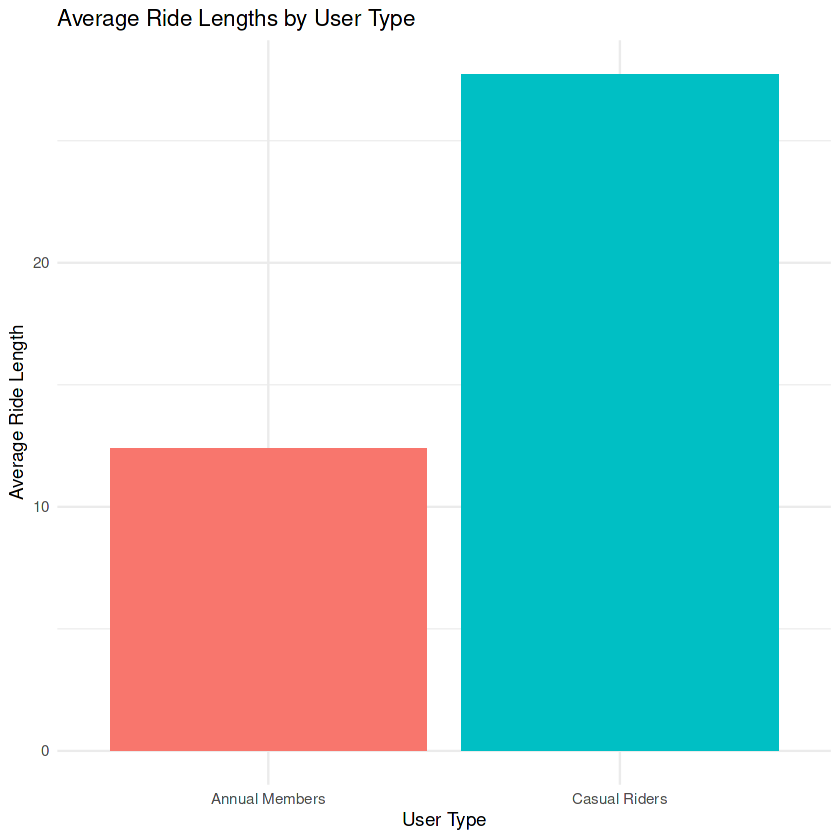

In [11]:
# Create a data frame for plotting
avg_ride_lengths <- data.frame(
  User_Type = c("Annual Members", "Casual Riders"),
  Average_Ride_Length = c(avg_duration_annual, avg_duration_casual)
)

# Create the bar plot
p <- ggplot(avg_ride_lengths, aes(x = User_Type, y = Average_Ride_Length, fill = User_Type)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Ride Lengths by User Type",
       x = "User Type",
       y = "Average Ride Length") +
  theme_minimal() +
  theme(legend.position = "none")

# Display the plot
print(p)

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


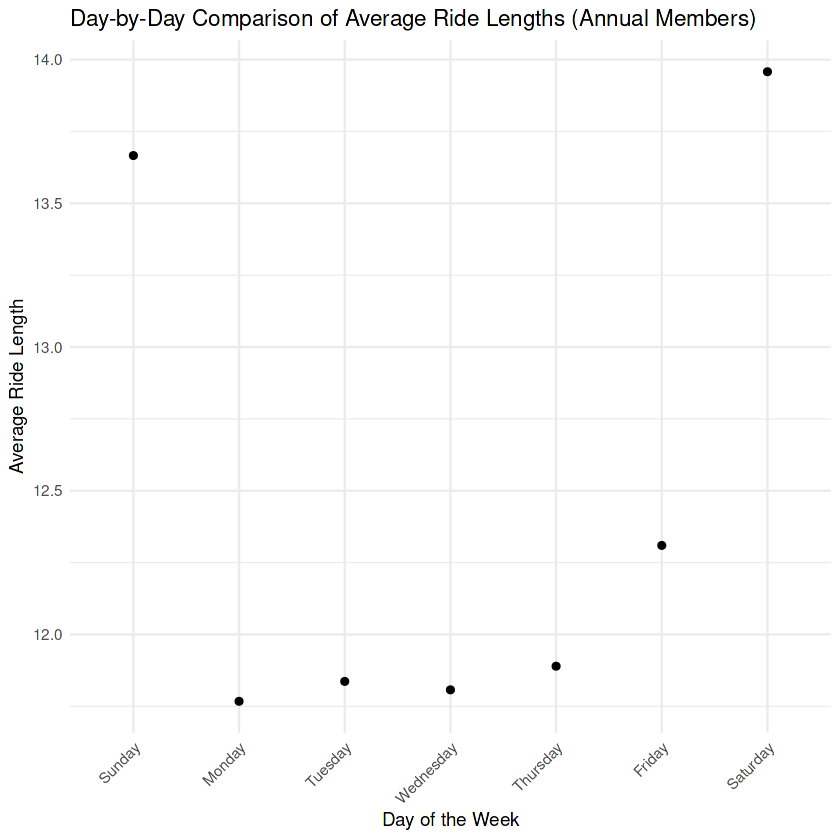

In [12]:
# Calculate average ride lengths per day for annual members
avg_ride_lengths_per_day <- aggregate(ride_length ~ day_of_week, data = annual_members, FUN = mean)

# Order the days of the week
ordered_days <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
avg_ride_lengths_per_day$day_of_week <- factor(avg_ride_lengths_per_day$day_of_week, levels = ordered_days)

# Create a line plot
p <- ggplot(avg_ride_lengths_per_day, aes(x = day_of_week, y = ride_length)) +
  geom_line() +
  geom_point() +
  labs(title = "Day-by-Day Comparison of Average Ride Lengths (Annual Members)",
       x = "Day of the Week",
       y = "Average Ride Length") +
  scale_x_discrete(labels = ordered_days) +
  theme_minimal()

# Rotate x-axis labels for better visibility
p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


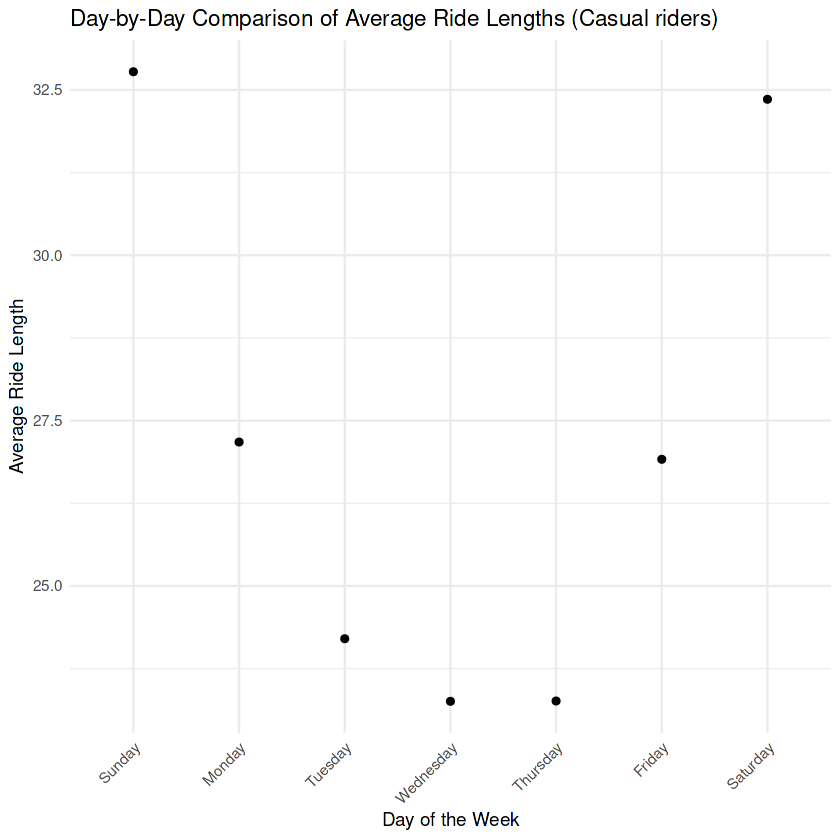

In [13]:
# Calculate average ride lengths per day for annual members
avg_ride_lengths_per_day <- aggregate(ride_length ~ day_of_week, data = casual_riders, FUN = mean)

# Order the days of the week
ordered_days <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
avg_ride_lengths_per_day$day_of_week <- factor(avg_ride_lengths_per_day$day_of_week, levels = ordered_days)

# Create a line plot
p <- ggplot(avg_ride_lengths_per_day, aes(x = day_of_week, y = ride_length)) +
  geom_line() +
  geom_point() +
  labs(title = "Day-by-Day Comparison of Average Ride Lengths (Casual riders)",
       x = "Day of the Week",
       y = "Average Ride Length") +
  scale_x_discrete(labels = ordered_days) +
  theme_minimal()

# Rotate x-axis labels for better visibility
p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


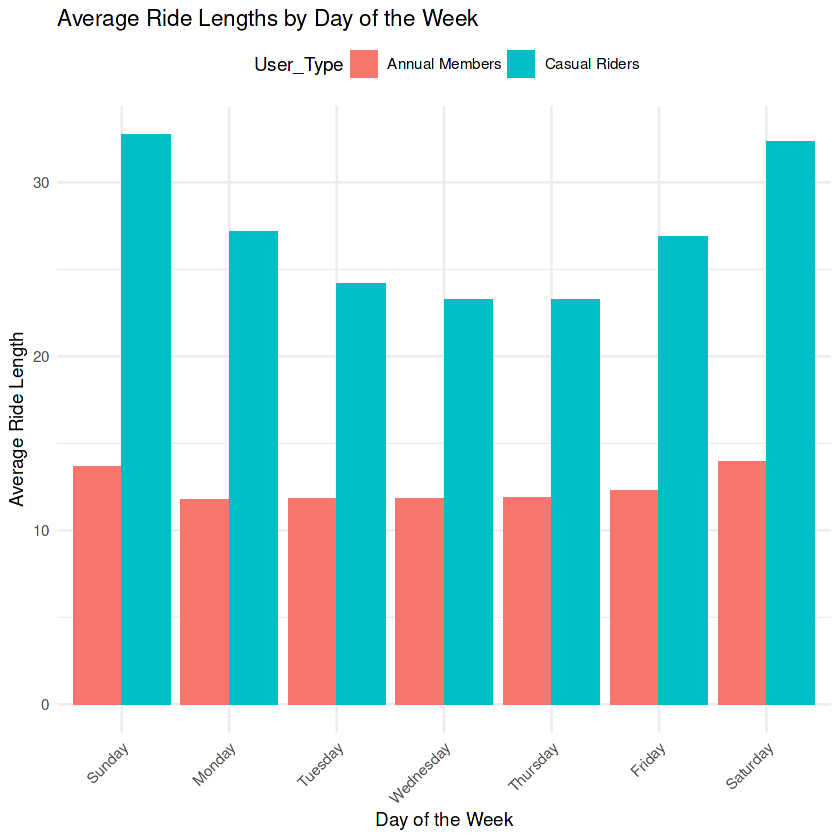

In [14]:
# Calculate average ride lengths per day for annual members
avg_ride_lengths_annual <- aggregate(ride_length ~ day_of_week, data = annual_members, FUN = mean)
avg_ride_lengths_annual$User_Type <- "Annual Members"

# Calculate average ride lengths per day for casual riders
avg_ride_lengths_casual <- aggregate(ride_length ~ day_of_week, data = casual_riders, FUN = mean)
avg_ride_lengths_casual$User_Type <- "Casual Riders"

# Combine the data frames
avg_ride_lengths_combined <- rbind(avg_ride_lengths_annual, avg_ride_lengths_casual)

# Order the days of the week
ordered_days <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
avg_ride_lengths_combined$day_of_week <- factor(avg_ride_lengths_combined$day_of_week, levels = ordered_days)

# Create side-by-side bar plots
p <- ggplot(avg_ride_lengths_combined, aes(x = day_of_week, y = ride_length, fill = User_Type)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average Ride Lengths by Day of the Week",
       x = "Day of the Week",
       y = "Average Ride Length") +
  scale_x_discrete(labels = ordered_days) +
  theme_minimal() +
  theme(legend.position = "top")

# Rotate x-axis labels for better visibility
p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [15]:
# Extract month from started_at for annual members
annual_members$Month <- month(annual_members$started_at, label = TRUE)

# Extract month from started_at for casual riders
casual_riders$Month <- month(casual_riders$started_at, label = TRUE)

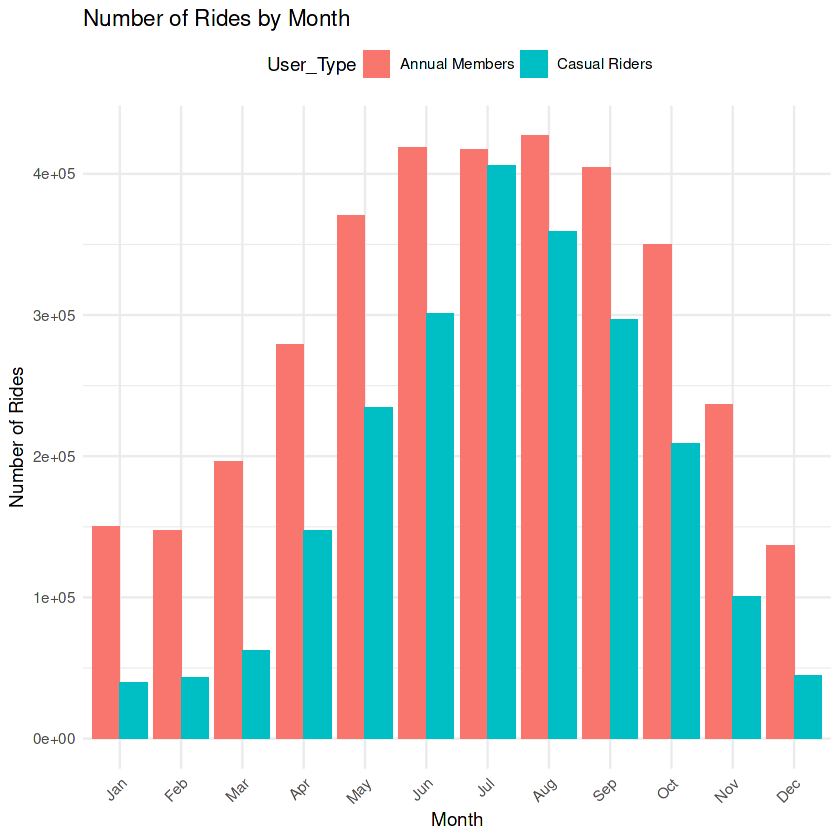

In [16]:
# Calculate ride counts per month for annual members
ride_counts_annual <- aggregate(ride_id ~ Month, data = annual_members, FUN = length)
ride_counts_annual$User_Type <- "Annual Members"

# Calculate ride counts per month for casual riders
ride_counts_casual <- aggregate(ride_id ~ Month, data = casual_riders, FUN = length)
ride_counts_casual$User_Type <- "Casual Riders"

# Combine the data frames
ride_counts_combined <- rbind(ride_counts_annual, ride_counts_casual)

# Order the months
ordered_months <- month.name[1:12]
ride_counts_combined$Month <- factor(ride_counts_combined$Month, levels = month.abb)

# Create side-by-side bar plots
p <- ggplot(ride_counts_combined, aes(x = Month, y = ride_id, fill = User_Type)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Number of Rides by Month",
       x = "Month",
       y = "Number of Rides") +
  scale_x_discrete(labels = month.abb) +
  theme_minimal() +
  theme(legend.position = "top")

# Rotate x-axis labels for better visibility
p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

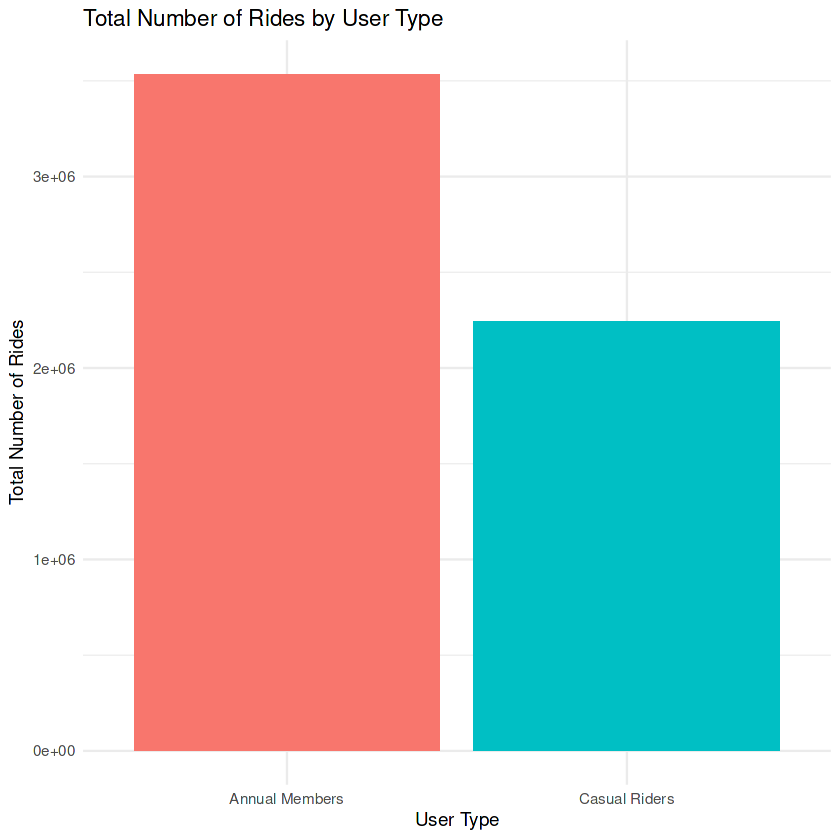

In [17]:
# Calculate total ride counts for annual members and casual riders
total_rides_annual <- nrow(annual_members)
total_rides_casual <- nrow(casual_riders)

# Create a data frame for plotting
total_rides_data <- data.frame(
  User_Type = c("Annual Members", "Casual Riders"),
  Total_Rides = c(total_rides_annual, total_rides_casual)
)

# Create the bar plot
p <- ggplot(total_rides_data, aes(x = User_Type, y = Total_Rides, fill = User_Type)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Number of Rides by User Type",
       x = "User Type",
       y = "Total Number of Rides") +
  theme_minimal() +
  theme(legend.position = "none")

# Display the plot
print(p)

Warning message:
“Removed 764 rows containing missing values (`geom_point()`).”


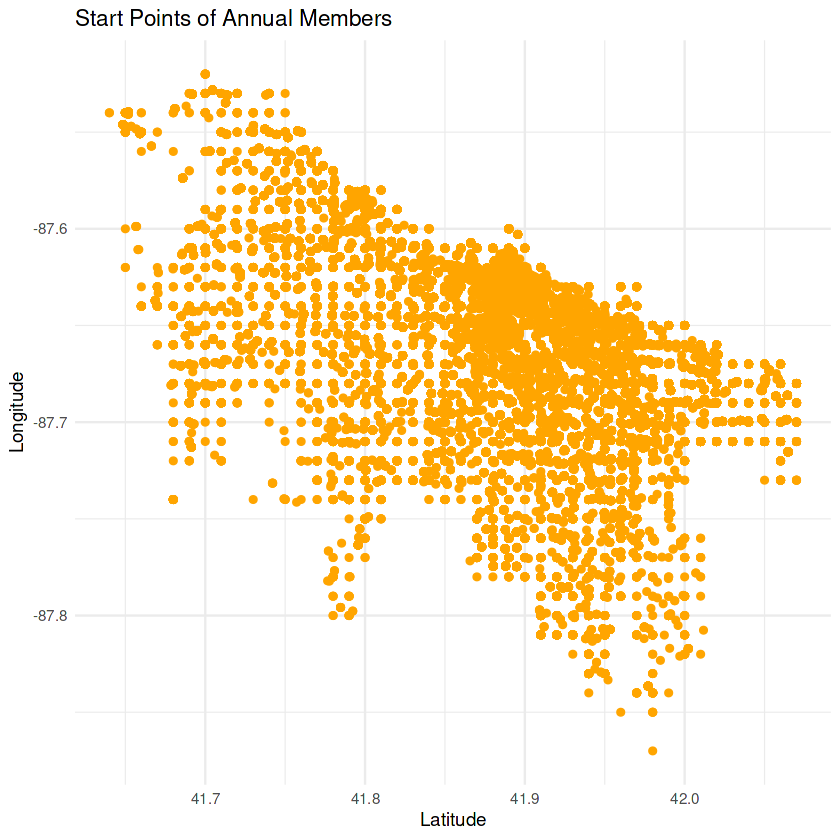

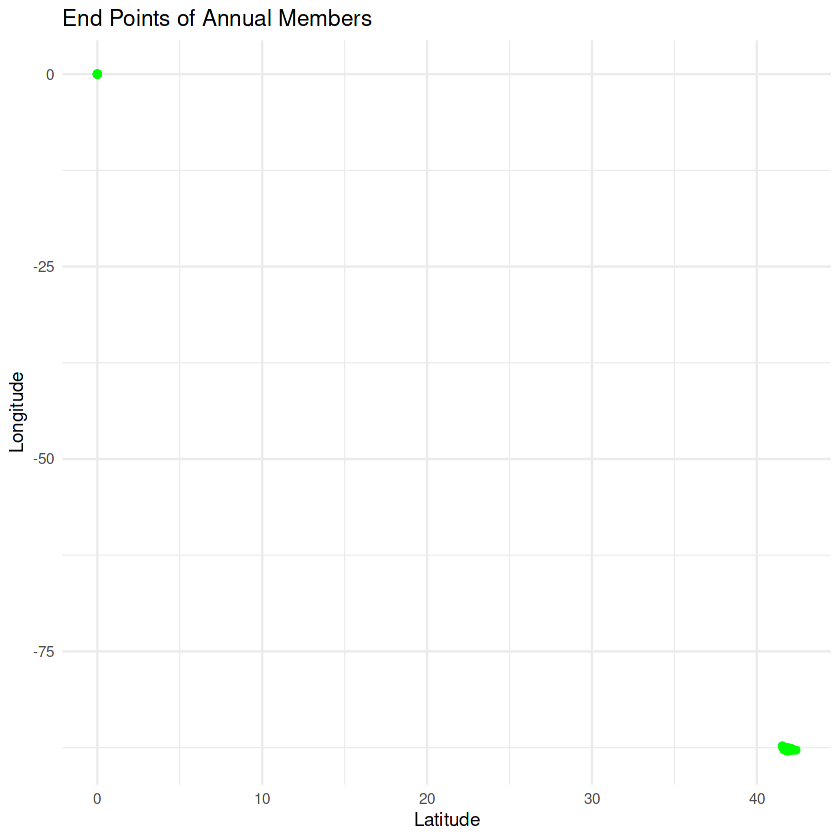

Warning message:
“Removed 5031 rows containing missing values (`geom_point()`).”


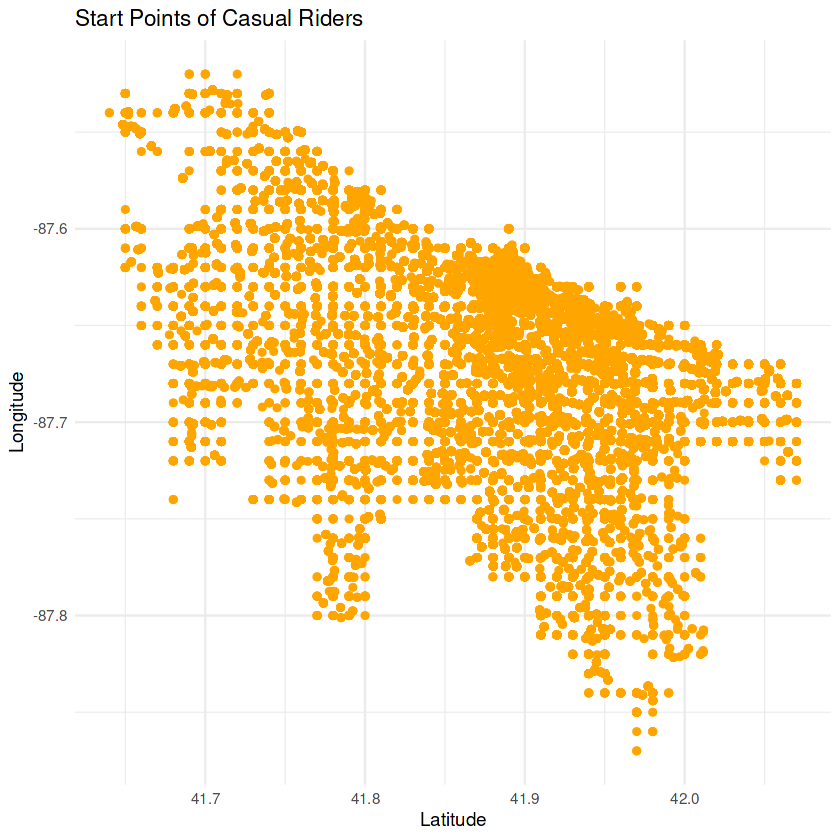

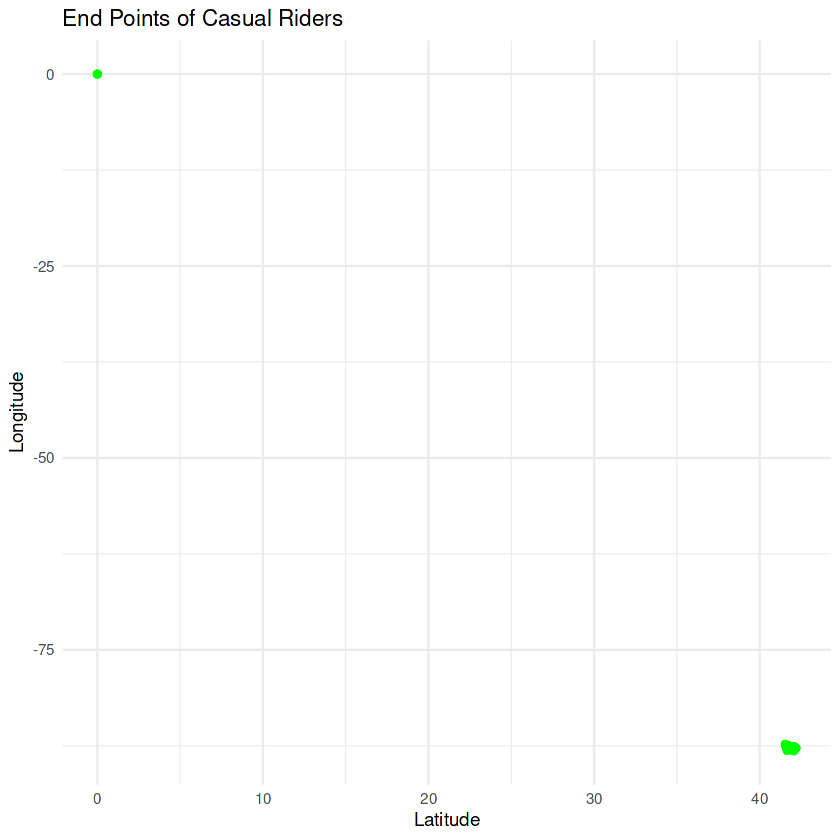

In [18]:

# Filter data for start points of annual members
start_points_annual <- annual_members[, c("start_lat", "start_lng")]
colnames(start_points_annual) <- c("Latitude", "Longitude")

# Filter data for end points of annual members
end_points_annual <- annual_members[, c("end_lat", "end_lng")]
colnames(end_points_annual) <- c("Latitude", "Longitude")

# Filter data for start points of casual riders
start_points_casual <- casual_riders[, c("start_lat", "start_lng")]
colnames(start_points_casual) <- c("Latitude", "Longitude")

# Filter data for end points of casual riders
end_points_casual <- casual_riders[, c("end_lat", "end_lng")]
colnames(end_points_casual) <- c("Latitude", "Longitude")

# Create scatter plot for start points of annual members
p1 <- ggplot(start_points_annual, aes(x = Latitude, y = Longitude)) +
  geom_point(color = "orange") +
  labs(title = "Start Points of Annual Members",
       x = "Latitude",
       y = "Longitude") +
  theme_minimal()

# Create scatter plot for end points of annual members
p2 <- ggplot(end_points_annual, aes(x = Latitude, y = Longitude)) +
  geom_point(color = "green") +
  labs(title = "End Points of Annual Members",
       x = "Latitude",
       y = "Longitude") +
  theme_minimal()

# Create scatter plot for start points of casual riders
p3 <- ggplot(start_points_casual, aes(x = Latitude, y = Longitude)) +
  geom_point(color = "orange") +
  labs(title = "Start Points of Casual Riders",
       x = "Latitude",
       y = "Longitude") +
  theme_minimal()

# Create scatter plot for end points of casual riders
p4 <- ggplot(end_points_casual, aes(x = Latitude, y = Longitude)) +
  geom_point(color = "green") +
  labs(title = "End Points of Casual Riders",
       x = "Latitude",
       y = "Longitude") +
  theme_minimal()

# Display the plots
p1
p2
p3
p4